<a href="https://colab.research.google.com/github/bgim303/colab/blob/main/healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

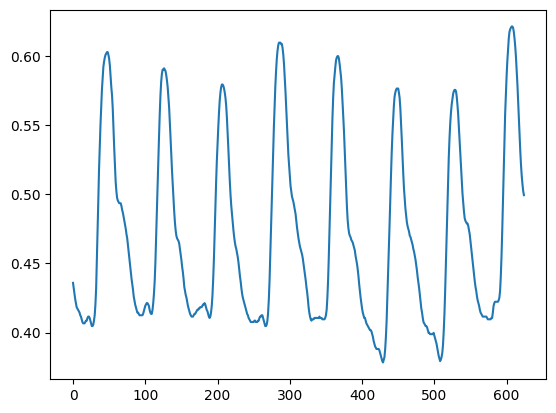

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


f = open('ppg.txt', 'r'); # 파일 열기
lines = f.readlines(); # 파일 읽기
f.close(); # 파일 닫기

# 숫자 배열로 변환하여 array에 저장
values = np.array(list(map(float, lines)));

plt.plot(values) # 그래프 그리기
plt.show() # 그래프 출력

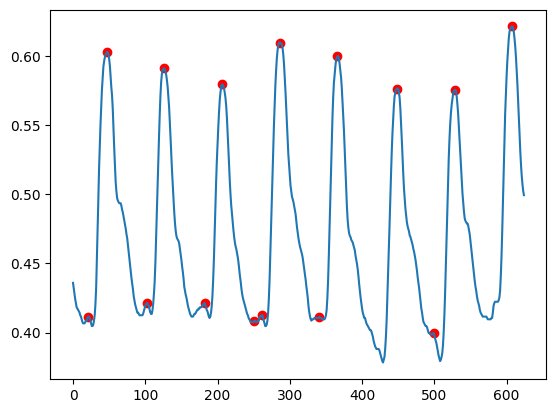

In [ ]:
from scipy.signal import find_peaks

# 국부 최댓값(피크) 검출
peaks, _ = find_peaks(values);

plt.plot(values)
plt.scatter(peaks, values[peaks], color='r', marker='o')

plt.show()

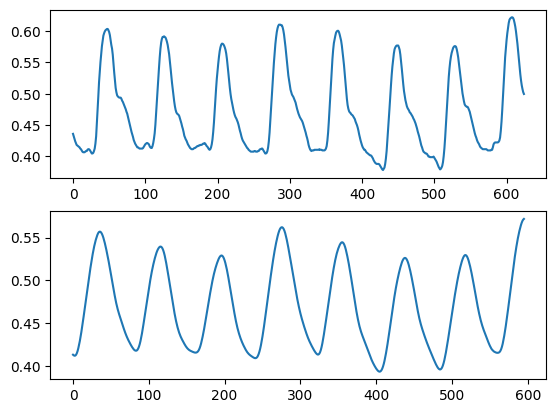

In [ ]:
#필터 적용하기 - 합성곱 이용 -> 평균 필터 적용
#필터 크기
kernel_size = 30;
kernel = np.ones(kernel_size) / kernel_size;
values_convolve = np.convolve(values, kernel, mode = 'valid');

plt.subplot(2, 1, 1)
plt.plot(values)
plt.subplot(2, 1, 2)
plt.plot(values_convolve)
plt.show()

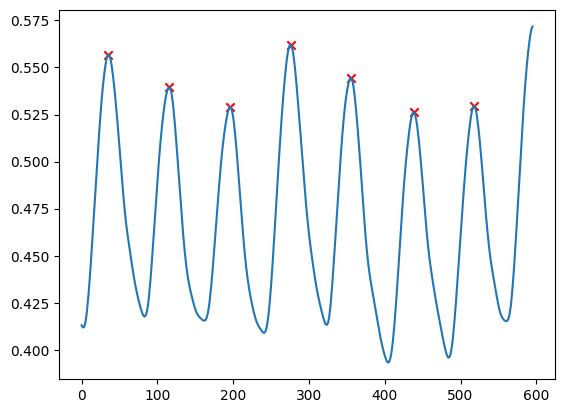

In [ ]:
#평균 필터 적용 후 피크 검출

peaks, _ = find_peaks(values_convolve);
plt.plot(values_convolve)
plt.scatter(peaks, values_convolve[peaks], color='r', marker='x')
#plt.show()

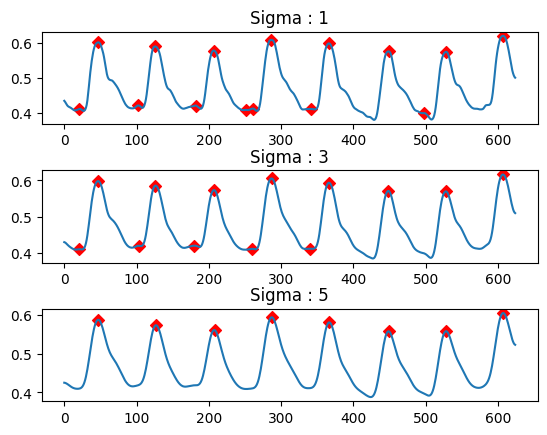

In [ ]:
#가우시안 필터 버전

from scipy.ndimage import gaussian_filter1d
sigmas = [1, 3, 5];
for i in np.arange(3):
    values_gaussian = gaussian_filter1d(values, sigma=sigmas[i]);
    peaks, _ = find_peaks(values_gaussian);
    plt.subplot(3, 1, i+1)
    plt.plot(values_gaussian)
    plt.scatter(peaks, values_gaussian[peaks], color='r', marker='D')
    plt.title('Sigma : ' + str(sigmas[i]))

plt.subplots_adjust(hspace=0.5) # 그래프 여백 조절
plt.show()

  0.14493433  0.12163700  0.11349233  0.15291767  0.13124800  0.13033667  0.11423967

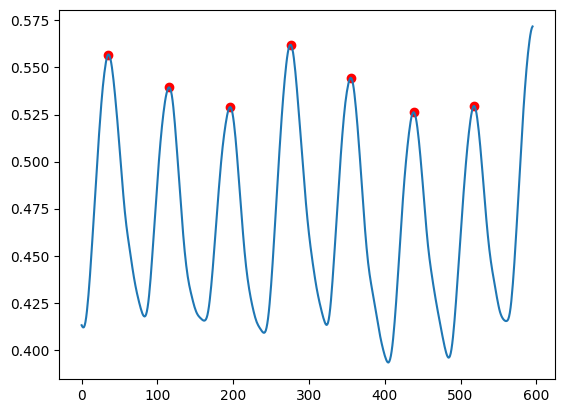

In [ ]:
#prominence 계산
from scipy.signal import peak_prominences
peaks, _ = find_peaks(values_convolve);

prominences = peak_prominences(values_convolve, peaks);
for p in prominences[0]:
    print(f'{p:12.8f}', end='')


#prominence 지정 피크 검출
peaks, _ = find_peaks(values_convolve, prominence = 0.1);

plt.plot(values_convolve)
plt.scatter(peaks, values_convolve[peaks], color = 'r', marker = 'o')
plt.show()

In [ ]:
#new - 고혈압
import numpy as np
import pandas as pd

hypertension = pd.read_csv("hypertension.csv", names=['성별', '나이',
'키', '몸무게', '수축기 혈압', '이완기 혈압', '심박수', '체질량지수', '고혈압']);
hypertension.head() # 데이터 확인

,성별,나이,키,몸무게,수축기 혈압,이완기 혈압,심박수,체질량지수,고혈압
0,성별,나이,키,몸무게,수축기 혈압,이완기 혈압,심박수,체질량지수,고혈압
1,1,47,150,47,101,71,79,20.89,0
2,1,53,160,70,108,73,84,27.34,0
3,1,47,150,47,98,56,69,20.89,0
4,1,48,155,57,117,70,75,23.73,0


In [ ]:
#데이터 변환
#특정 일부를 선택하여 numpy 배열로 변환

X = hypertension[['수축기 혈압', '이완기 혈압','심박수']].values
X = np.delete(X, 0, axis = 0).astype(int)

# class label을 numpy 배열로 변환
y = hypertension[['고혈압']].values
y = np.delete(y, 0, axis=0).astype(int)

# 정상과 고혈압 두 가지로 구분
index = np.nonzero(y);
y[index] = 1;
y = np.squeeze(y); # 1차원 배열로 변환

In [ ]:
# 고혈압 판단
import sklearn.svm as svm
from sklearn.model_selection import cross_val_score


svm_hypertension = svm.SVC(kernel = 'rbf')
scores = cross_val_score(svm_hypertension, X, y, cv=5)
print('교차검증 평균 : ', scores.mean())

교차검증 평균 :  0.9635306553911205
